Imports

In [1]:
from pagerank import iterate_pagerank, crawl, sample_pagerank, DAMPING, SAMPLES
import pytest as pt
import matplotlib.pyplot as plt

TOLERANCE = 1e-3  # Error tolerance = ±0.001 when comparing sample and iterate results

Preparing Corpus

In [2]:

def prepare_corpus(corpus_name):
    return crawl(corpus_name)

corpora = {
    "corpus0": prepare_corpus("corpus0"),
    "corpus1": prepare_corpus("corpus1"),
    "corpus2": prepare_corpus("corpus2")
}

Running PageRank Algorithm

In [3]:
def run_pagerank(corpus, damping_factor, corpus_name):
    N = len(corpus)
    pagerank = {page: 1 / N for page in corpus}
    convergence_threshold = 0.001
    iterations = 0
    convergence_data = []

    print(f"\nConvergence for {corpus_name}:\n")
    while True:
        new_pagerank = {}
        for page in corpus:
            rank_sum = sum(
                pagerank[link] / len(corpus[link]) for link in corpus if page in corpus[link]
            )
            rank_sum += sum(
                pagerank[link] / N for link in corpus if not corpus[link]
            )
            new_pagerank[page] = (1 - damping_factor) / N + damping_factor * rank_sum

        difference = max(abs(new_pagerank[page] - pagerank[page]) for page in pagerank)
        convergence_data.append(difference)
        
        print(f"Iteration {iterations}: {new_pagerank}, max difference: {difference}")

        if difference < convergence_threshold:
            break

        pagerank = new_pagerank.copy()
        iterations += 1

    return new_pagerank, convergence_data, iterations

results = {}
for corpus_name, corpus in corpora.items():
    results[corpus_name] = run_pagerank(corpus, DAMPING, corpus_name)


Convergence for corpus0:

Iteration 0: {'4.html': 0.14375, '2.html': 0.56875, '1.html': 0.14375, '3.html': 0.14375}, max difference: 0.31875
Iteration 1: {'4.html': 0.09859375000000001, '2.html': 0.34296875000000004, '1.html': 0.27921874999999996, '3.html': 0.27921874999999996}, max difference: 0.22578124999999993
Iteration 2: {'4.html': 0.15616796875, '2.html': 0.4773085937499999, '1.html': 0.18326171875000002, '3.html': 0.18326171875000002}, max difference: 0.13433984374999985
Iteration 3: {'4.html': 0.11538623046875002, '2.html': 0.40390146484375, '1.html': 0.24035615234374996, '3.html': 0.24035615234374996}, max difference: 0.0734071289062499
Iteration 4: {'4.html': 0.13965136474609374, '2.html': 0.4420323901367187, '1.html': 0.20915812255859376, '3.html': 0.20915812255859376}, max difference: 0.03813092529296869
Iteration 5: {'4.html': 0.12639220208740234, '2.html': 0.42288026629638675, '1.html': 0.22536376580810544, '3.html': 0.22536376580810544}, max difference: 0.0191521238403

Validating Results

In [4]:
def validate_results(results, expected_values, corpus_name):
    """
    Validate the PageRank results against expected values.
    """
    pagerank_values, convergence_data, iterations = results
    for page in pagerank_values.keys():
        assert pagerank_values[page] == pt.approx(expected_values[page], abs=TOLERANCE)
    print(f"Validation for {corpus_name} passed!")

# Expected values for corpus0
expected_corpus0 = {"1.html": 0.2202, "2.html": 0.4289, "3.html": 0.2202, "4.html": 0.1307}

# Validate corpus0
validate_results(results["corpus0"], expected_corpus0, "corpus0")


Validation for corpus0 passed!


Visualizing Convergence

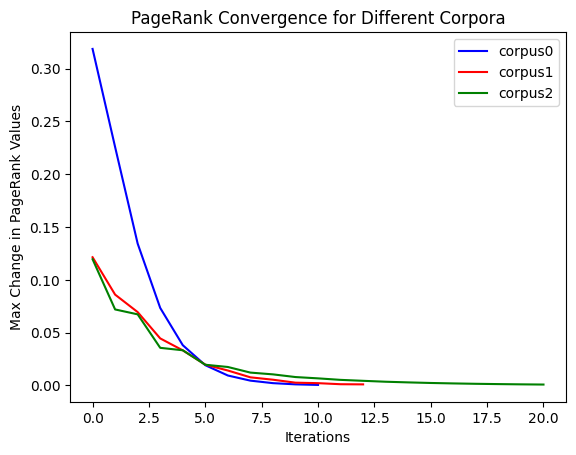

In [5]:
def visualize_convergence(results, corpus_name, color):
    _, convergence_data, iterations = results
    plt.plot(range(iterations + 1), convergence_data, label=corpus_name, color=color)


def plot_all_convergences(results):
    """
    Plot convergence lines for all corpora.
    """
    colors = {
        "corpus0": "blue",
        "corpus1": "red",
        "corpus2": "green"
    }

    for corpus_name, color in colors.items():
        visualize_convergence(results[corpus_name], corpus_name, color)

    plt.xlabel('Iterations')
    plt.ylabel('Max Change in PageRank Values')
    plt.title('PageRank Convergence for Different Corpora')
    plt.legend()
    plt.show()

plot_all_convergences(results)

Visualizing Sampling Results

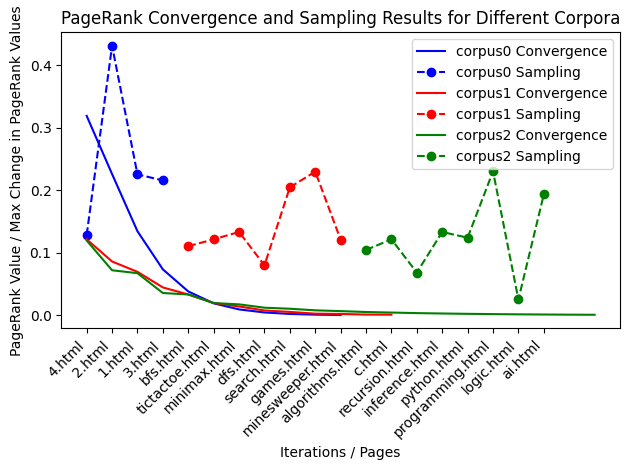

In [6]:
def run_pagerank(corpus, damping_factor):
    N = len(corpus)
    pagerank = {page: 1 / N for page in corpus}
    convergence_threshold = 0.001
    iterations = 0
    convergence_data = []

    while True:
        new_pagerank = {}
        for page in corpus:
            rank_sum = sum(
                pagerank[link] / len(corpus[link]) for link in corpus if page in corpus[link]
            )
            rank_sum += sum(
                pagerank[link] / N for link in corpus if not corpus[link]
            )
            new_pagerank[page] = (1 - damping_factor) / N + damping_factor * rank_sum

        difference = max(abs(new_pagerank[page] - pagerank[page]) for page in pagerank)
        convergence_data.append(difference)

        if difference < convergence_threshold:
            break

        pagerank = new_pagerank.copy()
        iterations += 1

    return pagerank, convergence_data, iterations


def visualize_convergence(results, corpus_name, color):
    _, convergence_data, iterations = results
    plt.plot(range(iterations + 1), convergence_data, linestyle='-', color=color, label=f'{corpus_name} Convergence')


def visualize_sampling(corpus, damping_factor, samples, corpus_name, color):
    sample_results = sample_pagerank(corpus, damping_factor, samples)
    pages = list(sample_results.keys())
    values = list(sample_results.values())

    plt.plot(pages, values, linestyle='--', marker='o', color=color, label=f'{corpus_name} Sampling')


def plot_all_results(corpora, results, damping_factor, samples):
    colors = {
        "corpus0": "blue",
        "corpus1": "red",
        "corpus2": "green"
    }

    for corpus_name, color in colors.items():
        corpus = corpora[corpus_name]
        visualize_convergence(results[corpus_name], corpus_name, color)
        visualize_sampling(corpus, damping_factor, samples, corpus_name, color)

    plt.xlabel('Iterations / Pages')
    plt.ylabel('PageRank Value / Max Change in PageRank Values')
    plt.title('PageRank Convergence and Sampling Results for Different Corpora')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage:
corpora = {
    "corpus0": crawl("corpus0"),
    "corpus1": crawl("corpus1"),
    "corpus2": crawl("corpus2")
}

results = {}
for corpus_name, corpus in corpora.items():
    results[corpus_name] = run_pagerank(corpus, DAMPING)

plot_all_results(corpora, results, DAMPING, SAMPLES)


---

PageRank Convergence and Sampling Results Using Subplots

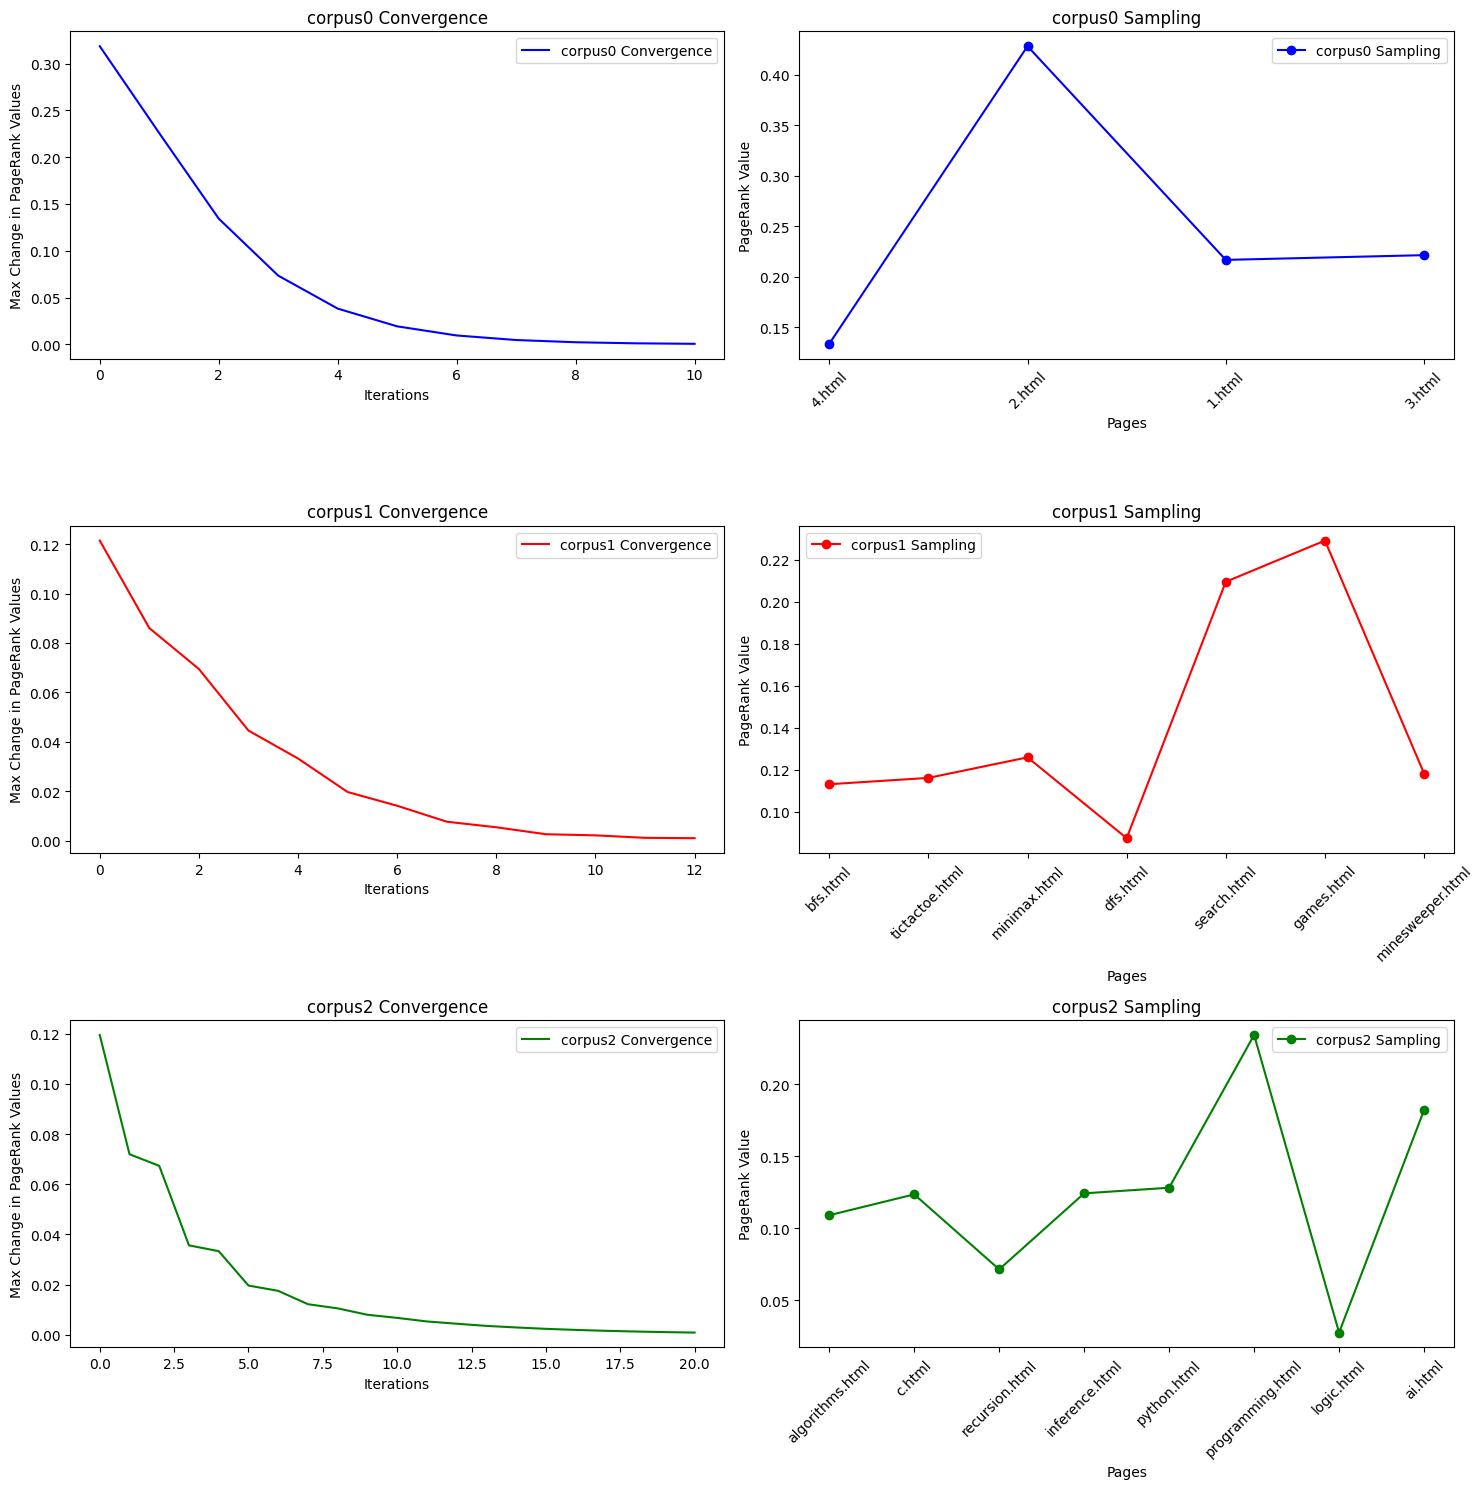

In [7]:
def visualize_convergence(ax, corpus_name, results, color):
    _, convergence_data, iterations = results
    ax.plot(range(iterations + 1), convergence_data, linestyle='-', color=color, label=f'{corpus_name} Convergence')
    ax.set_title(f'{corpus_name} Convergence')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Max Change in PageRank Values')
    ax.legend()


def visualize_sampling(ax, corpus, damping_factor, samples, corpus_name, color):
    sample_results = sample_pagerank(corpus, damping_factor, samples)
    pages = list(sample_results.keys())
    values = list(sample_results.values())
    
    ax.plot(pages, values, linestyle='-', color=color, marker='o', label=f'{corpus_name} Sampling')
    ax.set_title(f'{corpus_name} Sampling')
    ax.set_xlabel('Pages')
    ax.set_ylabel('PageRank Value')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)


def plot_all_results(corpora, results, damping_factor, samples):
    """
    Plot convergence and sampling results for all corpora.
    """
    colors = {
        "corpus0": "blue",
        "corpus1": "red",
        "corpus2": "green"
    }

    fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # 3 corpora, 2 subplots each (convergence and sampling)

    for i, (corpus_name, color) in enumerate(colors.items()):
        corpus = corpora[corpus_name]
        visualize_convergence(axes[i, 0], corpus_name, results[corpus_name], color)
        visualize_sampling(axes[i, 1], corpus, damping_factor, samples, corpus_name, color)

    plt.tight_layout()
    plt.show()

# Running the plotting function
plot_all_results(corpora, results, DAMPING, SAMPLES)


---

Visualizing PageRank Evolution

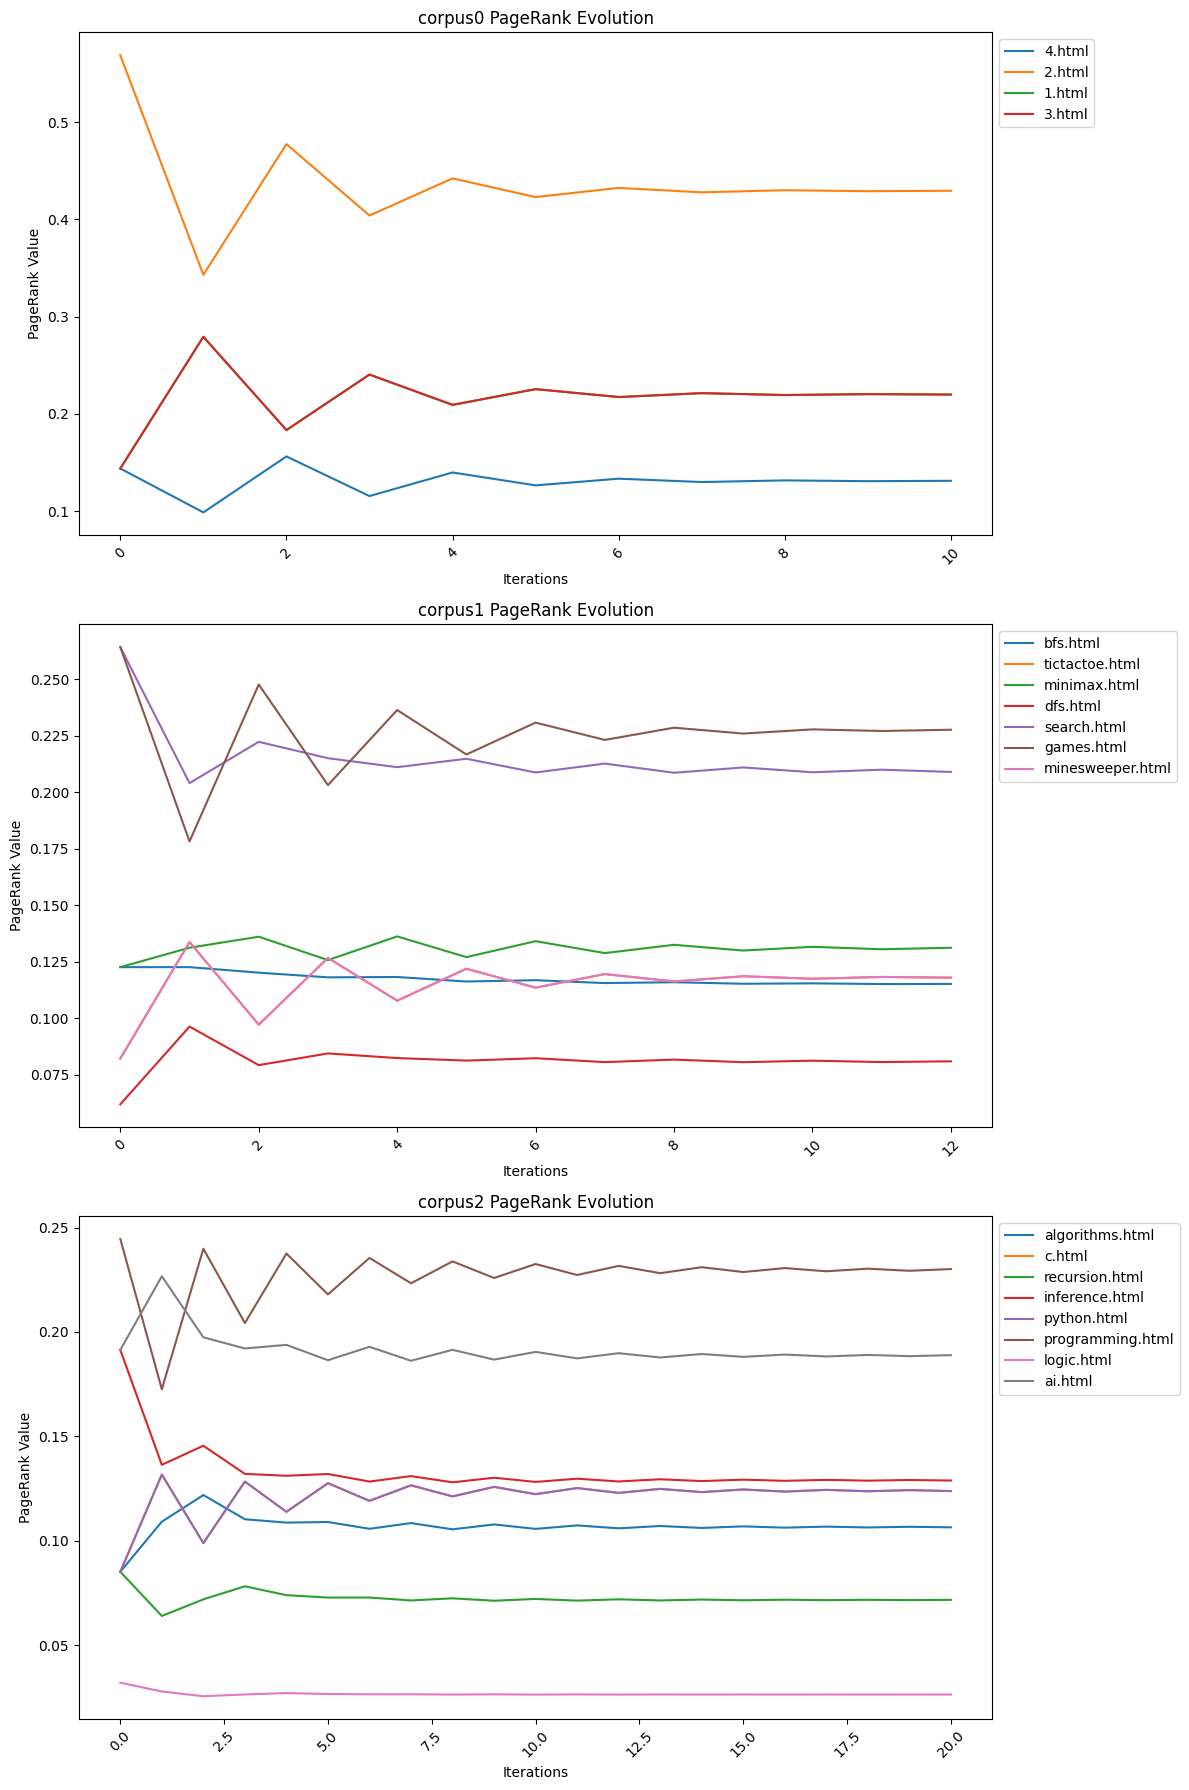

In [8]:
def run_pagerank(corpus, damping_factor):
    N = len(corpus)
    pagerank = {page: 1 / N for page in corpus}
    convergence_threshold = 0.001
    iterations = 0
    convergence_data = {page: [] for page in corpus}

    while True:
        new_pagerank = {}
        for page in corpus:
            rank_sum = sum(
                pagerank[link] / len(corpus[link]) for link in corpus if page in corpus[link]
            )
            rank_sum += sum(
                pagerank[link] / N for link in corpus if not corpus[link]
            )
            new_pagerank[page] = (1 - damping_factor) / N + damping_factor * rank_sum

        difference = max(abs(new_pagerank[page] - pagerank[page]) for page in pagerank)
        
        for page in corpus:
            convergence_data[page].append(new_pagerank[page])

        if difference < convergence_threshold:
            break

        pagerank = new_pagerank.copy()
        iterations += 1

    return pagerank, convergence_data, iterations


def visualize_page_evolution(corpora, results):
    colors = {
        "corpus0": "blue",
        "corpus1": "red",
        "corpus2": "green"
    }

    fig, axes = plt.subplots(3, 1, figsize=(12, 18))  # 3 corpora, 1 subplot each

    for i, (corpus_name, color) in enumerate(colors.items()):
        ax = axes[i]
        pagerank, convergence_data, _ = results[corpus_name]

        for page, values in convergence_data.items():
            ax.plot(range(len(values)), values, label=page)

        ax.set_title(f'{corpus_name} PageRank Evolution')
        ax.set_xlabel('Iterations')
        ax.set_ylabel('PageRank Value')
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Prepare the corpora
corpora = {
    "corpus0": crawl("corpus0"),
    "corpus1": crawl("corpus1"),
    "corpus2": crawl("corpus2")
}

# Run PageRank and collect convergence data
results = {}
for corpus_name, corpus in corpora.items():
    results[corpus_name] = run_pagerank(corpus, DAMPING)

# Visualize the evolution of PageRank values for each page in each corpus
visualize_page_evolution(corpora, results)


#### Reference
- In the video at min 12:50 you can see how it works:
- https://www.youtube.com/watch?v=JGQe4kiPnrU